In [1]:
from DQN import *
from DDQN import *
from DDQN_updated import *
import gym
import pygame
env =gym.make("LunarLander-v2")
import sys

pygame 2.1.2 (SDL 2.0.18, Python 3.8.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


/opt/anaconda3/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


## 1. Deep Q Learning Agent

In [2]:
agent_dqn = DQNAgent ( env =env, lr =5e-4,epsilon=1,epsilon_min=0.01,gamma=0.99,decay_factor=0.995)
agent_dqn.train(2000,True)

Episode 0	Average Score: -360.33


/Users/sunil/msds/Deep Learning/Project/DQN.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1634272482218/work/torch/csrc/utils/tensor_new.cpp:201.)
  states = torch.FloatTensor(states)


Episode 100	Average Score: -151.73
Episode 200	Average Score: -93.796
Episode 300	Average Score: 15.897
Episode 400	Average Score: 76.64
Episode 500	Average Score: 134.78
Episode 600	Average Score: 134.89
Episode 647	Average Score: 202.04Mission Accomplished


# 2. Double Deep Q learning Agent

In [3]:
agent_ddqn = DDQNAgent ( env =env, lr =5e-4,epsilon=1,epsilon_min=0.01,gamma=0.99,decay_factor=0.995)
agent_ddqn.train(2000,True)

Episode 0	Average Score: -135.50
Episode 100	Average Score: -189.61
Episode 200	Average Score: -118.79
Episode 300	Average Score: -100.74
Episode 400	Average Score: -30.63
Episode 500	Average Score: -21.80
Episode 600	Average Score: -43.49
Episode 700	Average Score: -47.08
Episode 800	Average Score: -0.944
Episode 900	Average Score: 83.98
Episode 1000	Average Score: 167.46
Episode 1100	Average Score: 144.45
Episode 1200	Average Score: 97.641
Episode 1300	Average Score: 70.66
Episode 1400	Average Score: 97.929
Episode 1500	Average Score: 114.43
Episode 1600	Average Score: 82.751
Episode 1700	Average Score: 154.18
Episode 1800	Average Score: 142.56
Episode 1900	Average Score: 76.974
Episode 1999	Average Score: 136.33

# 3. Double Deep Q learning Agent ( Updated Version )

In [4]:
agent_ddqn2 = DDQNAgent2 ( env =env, lr =5e-4,epsilon=1,epsilon_min=0.01,gamma=0.99,decay_factor=0.995,tau=1e-3)
agent_ddqn2.train(2000,True)

Episode 0	Average Score: -128.87
Episode 100	Average Score: -165.83
Episode 200	Average Score: -134.31
Episode 300	Average Score: -77.329
Episode 400	Average Score: -0.405
Episode 500	Average Score: 115.85
Episode 600	Average Score: 106.39
Episode 700	Average Score: 169.05
Episode 740	Average Score: 201.62Mission Accomplished


# 4. Comparision Between three Algorithms

In [24]:
dqn_rewards = agent_dqn.episodes_rewards
ddqn_rewards = agent_ddqn.episodes_rewards
ddqn2_rewards = agent_ddqn2.episodes_rewards

def smooth(ls):
    ans=[]
    for i in range(len(ls)):
        ans.append(np.mean(ls[:i][-100:]))
    return ans

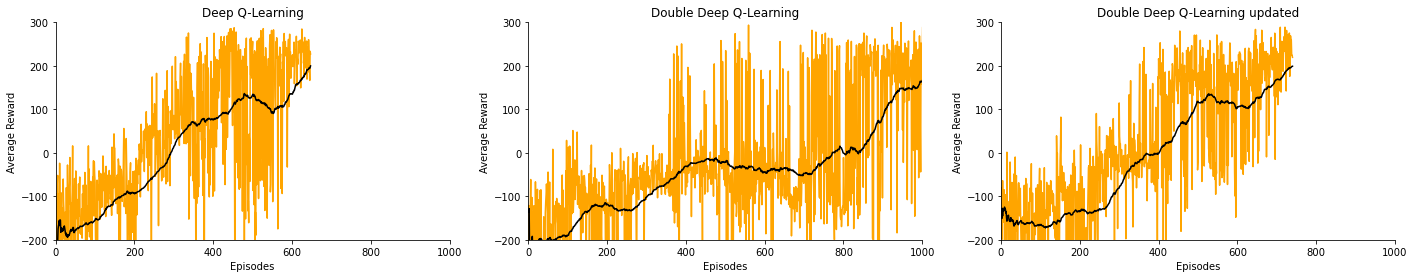

In [37]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(24,4),nrows=1,ncols=3)
ax = ax.flatten()
def plot_ax(ax,rewards_ls,title):
    ax.plot(rewards_ls,color="orange")
    ax.plot(smooth(rewards_ls),color='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title)
    ax.set_xlim([0,1000])
    ax.set_ylim([-200,300])
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Average Reward")
plot_ax(ax[0],dqn_rewards,"Deep Q-Learning")
plot_ax(ax[1],ddqn_rewards,"Double Deep Q-Learning")
plot_ax(ax[2],ddqn2_rewards,"Double Deep Q-Learning updated")
    

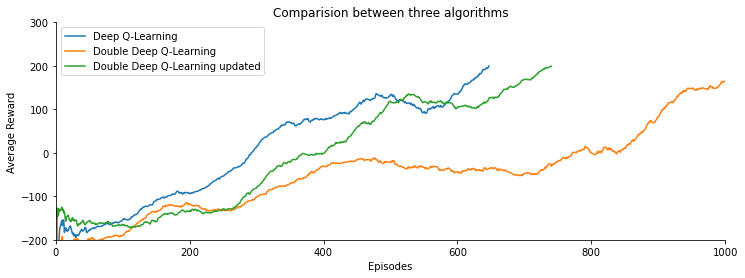

In [36]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(smooth(dqn_rewards),label="Deep Q-Learning")
ax.plot(smooth(ddqn_rewards),label='Double Deep Q-Learning')
ax.plot(smooth(ddqn2_rewards), label="Double Deep Q-Learning updated")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Episodes")
ax.set_ylabel("Average Reward")
ax.set_title("Comparision between three algorithms")
ax.set_xlim([0,1000])
ax.set_ylim([-200,300])
ax.legend()
plt.show()